# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [4]:
#Taking sample of the data - 5000 data points out of 1 million 
transactions_sample = transactions.sample(n=5000, random_state=42)
transactions_sample

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
987231,CASH_IN,54152.03,C865744496,42823.36,96975.39,C667346055,11438021.32,10695480.59,0,0
79954,CASH_IN,279331.66,C1710599742,8385167.08,8664498.74,C1699377197,394276.66,114945.00,0,0
567130,CASH_OUT,185673.97,C1570683955,0.00,0.00,C1562349196,396994.01,582667.97,0,0
500891,CASH_OUT,128216.41,C150381134,12158.00,0.00,C1245613416,17406313.64,17534530.05,0,0
55399,PAYMENT,17567.71,C660181819,104890.00,87322.29,M1631019047,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
512623,PAYMENT,2046.63,C443550253,0.00,0.00,M1480399889,0.00,0.00,0,0
949760,CASH_OUT,71629.56,C514570433,10438.00,0.00,C514839211,1486595.25,1852679.12,0,0
355691,CASH_OUT,95542.51,C1960694590,0.00,0.00,C1955456387,248551.25,344093.77,0,0
826650,PAYMENT,15710.43,C1957800040,466446.00,450735.57,M267303678,0.00,0.00,0,0


In [5]:
# TODO: view the shape of your data
transactions_sample.shape

(5000, 10)

In [6]:
#Describe 
transactions_sample.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.0
mean,1.858629e+05,8.306404e+05,8.524717e+05,1.105384e+06,1.237294e+06,0.001200,0.0
std,5.689367e+05,2.902442e+06,2.939080e+06,3.543319e+06,3.712328e+06,0.034624,0.0
min,1.622000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.434571e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,7.573145e+04,1.457450e+04,0.000000e+00,1.236676e+05,2.108886e+05,0.000000,0.0
75%,2.113186e+05,1.105376e+05,1.450127e+05,9.159593e+05,1.097791e+06,0.000000,0.0
max,1.955498e+07,3.057597e+07,3.080679e+07,1.261729e+08,1.268170e+08,1.000000,0.0


In [7]:
#Info

transactions_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 987231 to 112171
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            5000 non-null   object 
 1   amount          5000 non-null   float64
 2   nameOrig        5000 non-null   object 
 3   oldbalanceOrg   5000 non-null   float64
 4   newbalanceOrig  5000 non-null   float64
 5   nameDest        5000 non-null   object 
 6   oldbalanceDest  5000 non-null   float64
 7   newbalanceDest  5000 non-null   float64
 8   isFraud         5000 non-null   int64  
 9   isFlaggedFraud  5000 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 429.7+ KB


In [8]:
#null values
transactions_sample.isna().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Univarite Analysis


Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.


### Questions for Office Hours
1. Are we taking the sample before we do EDA?
2. My initial histogram for amount was hard to analyze because it was skewed. I removed the outliers and got better results
* If the reflection questions are about how most transactions behave compared to a few **rare** ones, did it make sense for me to take out the outliers or am i not getting the full picture by taking out the outliers?
* In the first bin (highest frequency), the amount of money transferred ranged from $16.22 to $16864.95. This range is really high to me personally but is that just my own bias? Is it accurate to say that this is how most transactions behave compared to the amount of money being transferred in these transactions?
3. If i was to do another univariate analysis on the other variable, am i using the original sample again? The transactions_clean variable has outliers removed but only based on the amount column.


In [9]:
transactions_sample


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
987231,CASH_IN,54152.03,C865744496,42823.36,96975.39,C667346055,11438021.32,10695480.59,0,0
79954,CASH_IN,279331.66,C1710599742,8385167.08,8664498.74,C1699377197,394276.66,114945.00,0,0
567130,CASH_OUT,185673.97,C1570683955,0.00,0.00,C1562349196,396994.01,582667.97,0,0
500891,CASH_OUT,128216.41,C150381134,12158.00,0.00,C1245613416,17406313.64,17534530.05,0,0
55399,PAYMENT,17567.71,C660181819,104890.00,87322.29,M1631019047,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
512623,PAYMENT,2046.63,C443550253,0.00,0.00,M1480399889,0.00,0.00,0,0
949760,CASH_OUT,71629.56,C514570433,10438.00,0.00,C514839211,1486595.25,1852679.12,0,0
355691,CASH_OUT,95542.51,C1960694590,0.00,0.00,C1955456387,248551.25,344093.77,0,0
826650,PAYMENT,15710.43,C1957800040,466446.00,450735.57,M267303678,0.00,0.00,0,0


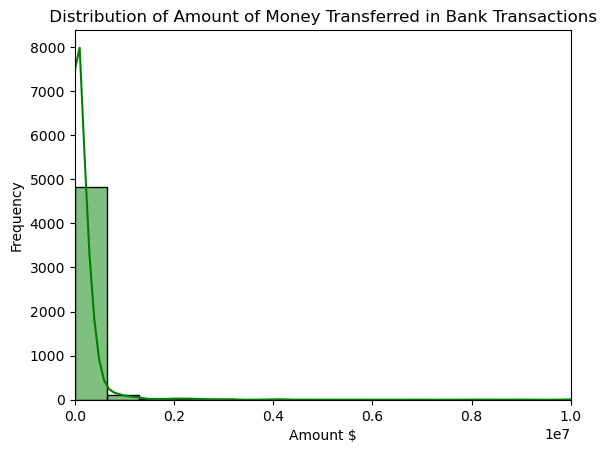

In [ ]:
#Amount: The amount of money transferred
#Histogram to show distributions of Amount with outliers

#plt.figure(figsize=(10, 6))
sns.histplot(data=transactions_sample, x = "amount", bins = 30, color= "green",  kde=True)
plt.xlim(0, 10000000) #
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title(' Distribution of Amount of Money Transferred in Bank Transactions ')
plt.show() 

#results are showing its screwed to the left and not showing the bins

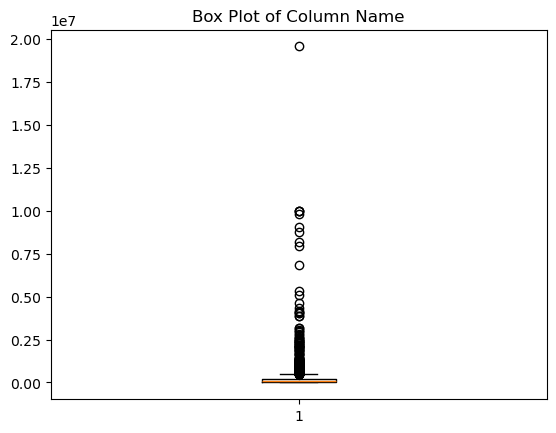

In [11]:
#making a boxplot
plt.boxplot(transactions_sample['amount'])
plt.title('Box Plot of Column Name')
plt.show()

In [12]:
#Checking for outliers

# Assuming df is your DataFrame and 'column_name' is the column to check for outliers
Q1 = transactions_sample['amount'].quantile(0.25) #25%	1.434571e+04
Q3 = transactions_sample['amount'].quantile(0.75) #75%	2.113186e+05
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = transactions_sample[(transactions_sample['amount'] < lower_bound) | (transactions_sample['amount'] > upper_bound)]
outliers
print(outliers[['amount']])
length = len(outliers['amount'])
print(f"Amount of outliers for 'Amount' column: {length}")


            amount
135049   600247.05
8985    1235380.10
892873  2956862.54
348666   572558.49
25768    516893.13
...            ...
158279   516403.72
518050  4064010.32
748491   923691.59
333752   542084.10
394905   887773.27

[259 rows x 1 columns]
Amount of outliers for 'Amount' column: 259


In [13]:
#This is finding the maximum outlier in order to see what the graph looks like
idx = outliers["amount"].idxmax()
max_row = outliers["amount"].loc[idx]
print(idx, max_row)
#outliers[['amount']].max()

113901 19554977.43


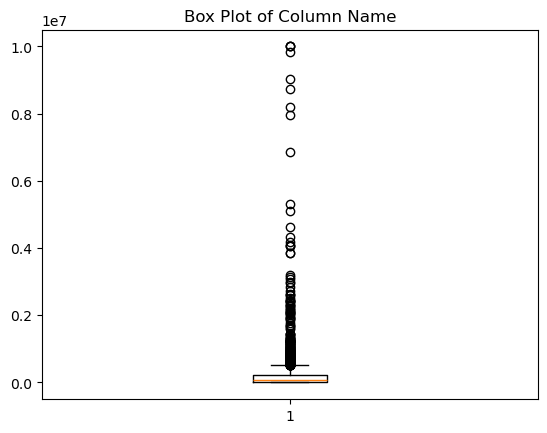

In [14]:
#Dropping the maximum outlier

trans_samp_no_max = transactions_sample.drop(113901) #This didn't change the results. The histogram is too skewed to do any analysis
trans_samp_no_max

#making a boxplot that removed that extreme value but there are still a lot of outliers
plt.boxplot(trans_samp_no_max['amount'])
plt.title('Box Plot of Column Name')
plt.show()


In [15]:
#Dropping all the outliers
#How will that effect the data?
#Is dropping the outliers appropriate when the question for univariate analysis is about how most transactions behave compared to a few **rare** ones?

indices = outliers["amount"].index

transactions_clean = transactions_sample.drop(indices)
transactions_clean

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
987231,CASH_IN,54152.03,C865744496,42823.36,96975.39,C667346055,11438021.32,10695480.59,0,0
79954,CASH_IN,279331.66,C1710599742,8385167.08,8664498.74,C1699377197,394276.66,114945.00,0,0
567130,CASH_OUT,185673.97,C1570683955,0.00,0.00,C1562349196,396994.01,582667.97,0,0
500891,CASH_OUT,128216.41,C150381134,12158.00,0.00,C1245613416,17406313.64,17534530.05,0,0
55399,PAYMENT,17567.71,C660181819,104890.00,87322.29,M1631019047,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
512623,PAYMENT,2046.63,C443550253,0.00,0.00,M1480399889,0.00,0.00,0,0
949760,CASH_OUT,71629.56,C514570433,10438.00,0.00,C514839211,1486595.25,1852679.12,0,0
355691,CASH_OUT,95542.51,C1960694590,0.00,0.00,C1955456387,248551.25,344093.77,0,0
826650,PAYMENT,15710.43,C1957800040,466446.00,450735.57,M267303678,0.00,0.00,0,0


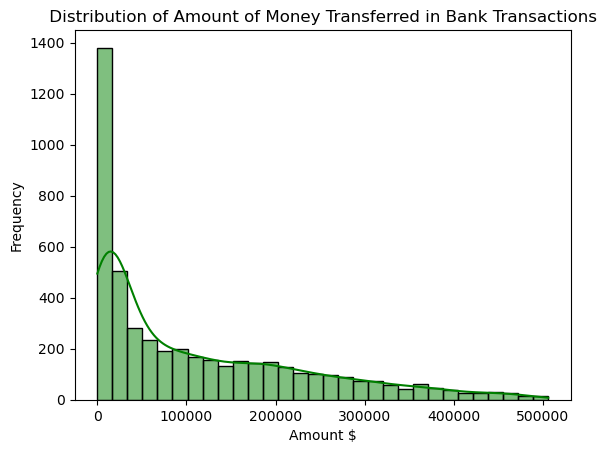

In [ ]:
#histogram dropping the outliers
sns.histplot(data=transactions_clean, x = "amount", bins = 30, color= "green",  kde=True)
plt.xlabel('Amount ')
plt.ylabel('Frequency')
plt.title(' Distribution of Amount of Money Transferred in Bank Transactions ')
plt.show() 

In [17]:
#Finding data in the first bin because the frequency is very large 

counts, bin_edges = np.histogram(
    transactions_clean["amount"],
    bins=30
)
# Show bin edges
print("Bin edges:", bin_edges)
first_bin_values = transactions_clean[
    (transactions_clean["amount"] >= bin_edges[0]) &
    (transactions_clean["amount"] < bin_edges[1])]

print("Number of rows in first bin:", len(first_bin_values))
print(f"Min value of bin: {first_bin_values["amount"].min()}")
print(f"Min value of bin: {first_bin_values["amount"].max()}")

Bin edges: [1.62200000e+01 1.68790590e+04 3.37418980e+04 5.06047370e+04
 6.74675760e+04 8.43304150e+04 1.01193254e+05 1.18056093e+05
 1.34918932e+05 1.51781771e+05 1.68644610e+05 1.85507449e+05
 2.02370288e+05 2.19233127e+05 2.36095966e+05 2.52958805e+05
 2.69821644e+05 2.86684483e+05 3.03547322e+05 3.20410161e+05
 3.37273000e+05 3.54135839e+05 3.70998678e+05 3.87861517e+05
 4.04724356e+05 4.21587195e+05 4.38450034e+05 4.55312873e+05
 4.72175712e+05 4.89038551e+05 5.05901390e+05]
Number of rows in first bin: 1380
Min value of bin: 16.22
Min value of bin: 16864.95


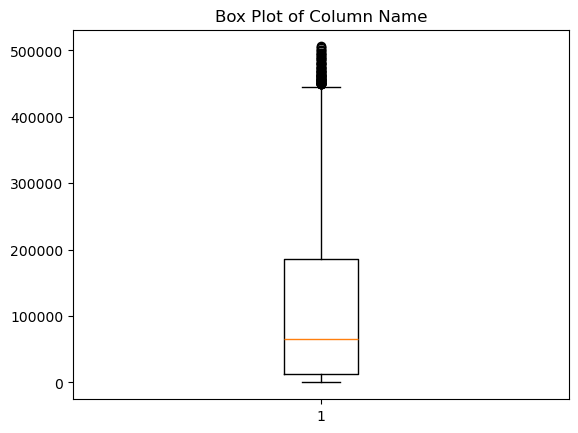

In [18]:
plt.boxplot(transactions_clean['amount'])
plt.title('Box Plot of Column Name')
plt.show()

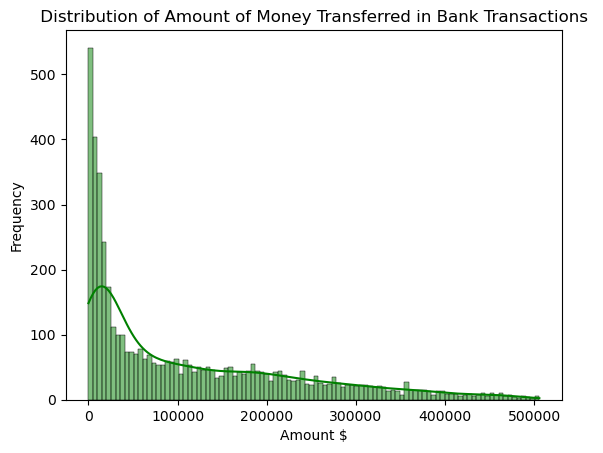

In [19]:
#histogram dropping the outliers with 100 bins but I know that is too many
sns.histplot(data=transactions_clean, x = "amount", bins = 100, color= "green",  kde=True)
plt.xlabel('Amount $')
plt.ylabel('Frequency')
plt.title(' Distribution of Amount of Money Transferred in Bank Transactions ')
plt.show() 

In [20]:

counts, bin_edges = np.histogram(
    transactions_clean["amount"],
    bins=100
)
# Show bin edges
print("Bin edges:", bin_edges)
first_bin_values = transactions_clean[
    (transactions_clean["amount"] >= bin_edges[0]) &
    (transactions_clean["amount"] < bin_edges[1])]

print("Number of rows in first bin:", len(first_bin_values))
print(f"Min value of bin: {first_bin_values["amount"].min()}")
print(f"Min value of bin: {first_bin_values["amount"].max()}")

Bin edges: [1.62200000e+01 5.07507170e+03 1.01339234e+04 1.51927751e+04
 2.02516268e+04 2.53104785e+04 3.03693302e+04 3.54281819e+04
 4.04870336e+04 4.55458853e+04 5.06047370e+04 5.56635887e+04
 6.07224404e+04 6.57812921e+04 7.08401438e+04 7.58989955e+04
 8.09578472e+04 8.60166989e+04 9.10755506e+04 9.61344023e+04
 1.01193254e+05 1.06252106e+05 1.11310957e+05 1.16369809e+05
 1.21428661e+05 1.26487513e+05 1.31546364e+05 1.36605216e+05
 1.41664068e+05 1.46722919e+05 1.51781771e+05 1.56840623e+05
 1.61899474e+05 1.66958326e+05 1.72017178e+05 1.77076030e+05
 1.82134881e+05 1.87193733e+05 1.92252585e+05 1.97311436e+05
 2.02370288e+05 2.07429140e+05 2.12487991e+05 2.17546843e+05
 2.22605695e+05 2.27664546e+05 2.32723398e+05 2.37782250e+05
 2.42841102e+05 2.47899953e+05 2.52958805e+05 2.58017657e+05
 2.63076508e+05 2.68135360e+05 2.73194212e+05 2.78253063e+05
 2.83311915e+05 2.88370767e+05 2.93429619e+05 2.98488470e+05
 3.03547322e+05 3.08606174e+05 3.13665025e+05 3.18723877e+05
 3.23782729e+

In [21]:
transactions_sample

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
987231,CASH_IN,54152.03,C865744496,42823.36,96975.39,C667346055,11438021.32,10695480.59,0,0
79954,CASH_IN,279331.66,C1710599742,8385167.08,8664498.74,C1699377197,394276.66,114945.00,0,0
567130,CASH_OUT,185673.97,C1570683955,0.00,0.00,C1562349196,396994.01,582667.97,0,0
500891,CASH_OUT,128216.41,C150381134,12158.00,0.00,C1245613416,17406313.64,17534530.05,0,0
55399,PAYMENT,17567.71,C660181819,104890.00,87322.29,M1631019047,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
512623,PAYMENT,2046.63,C443550253,0.00,0.00,M1480399889,0.00,0.00,0,0
949760,CASH_OUT,71629.56,C514570433,10438.00,0.00,C514839211,1486595.25,1852679.12,0,0
355691,CASH_OUT,95542.51,C1960694590,0.00,0.00,C1955456387,248551.25,344093.77,0,0
826650,PAYMENT,15710.43,C1957800040,466446.00,450735.57,M267303678,0.00,0.00,0,0


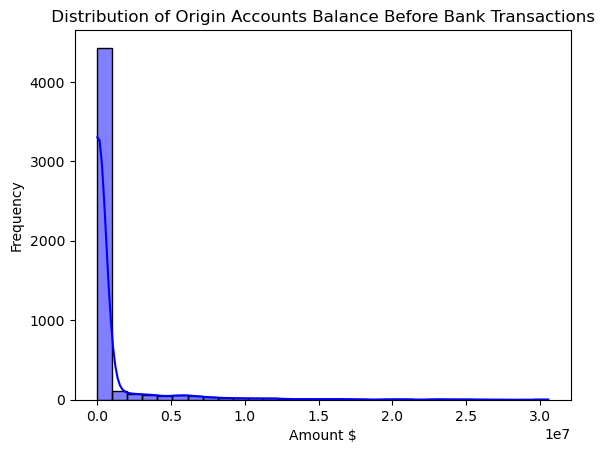

In [ ]:
#OldBalanceOrg: The origin accounts balance before the transaction w/outliers
#histogram of OldBalanceOrg

sns.histplot(data=transactions_sample, x = "oldbalanceOrg", bins = 30, color= "blue",  kde=True)
#plt.xlim(0, 10000000) 
plt.xlabel('Amount ')
plt.ylabel('Frequency')
plt.title(' Distribution of Origin Accounts Balance Before Bank Transactions ')
plt.show()

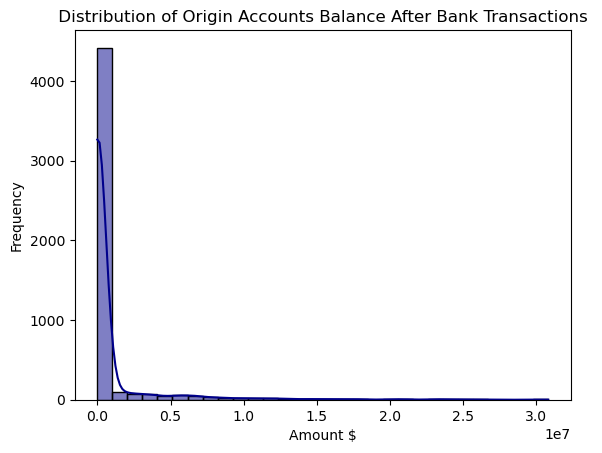

In [ ]:
# NewBalanceOrig: The origin accounts balance after the transaction
#histogram of NewBalanceOrg

sns.histplot(data=transactions_sample, x = "newbalanceOrig", bins = 30, color= "darkblue",  kde=True)
#plt.xlim(0, 10000000) 
plt.xlabel('Amount ')
plt.ylabel('Frequency')
plt.title(' Distribution of Origin Accounts Balance After Bank Transactions ')
plt.show()

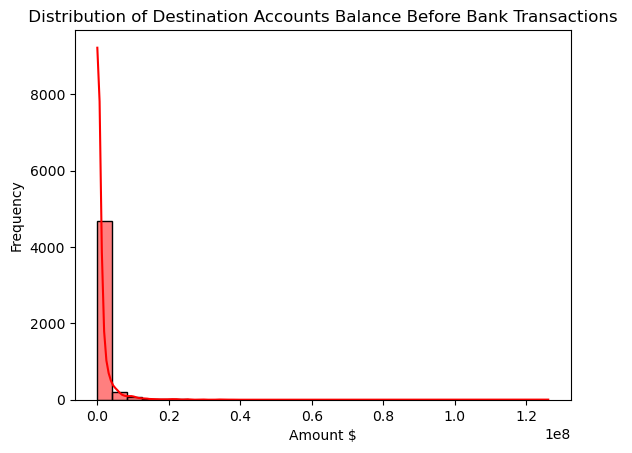

In [ ]:
#OldbalanceDest: The destination accounts balance before the transaction
#histogram of OldbalanceDest

sns.histplot(data=transactions_sample, x = "oldbalanceDest", bins = 30, color= "red",  kde=True)
#plt.xlim(0, 10000000) 
plt.xlabel('Amount ')
plt.ylabel('Frequency')
plt.title(' Distribution of Destination Accounts Balance Before Bank Transactions ')
plt.show()

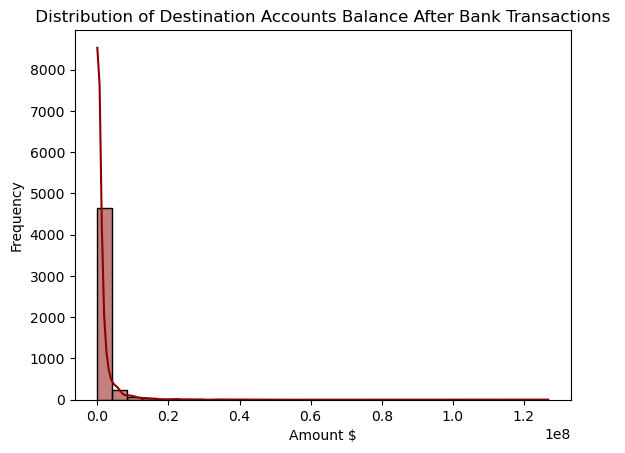

In [ ]:
#NewbalanceDest: The destination accounts balance after the transaction
#histogram of NewbalanceDest

sns.histplot(data=transactions_sample, x = "newbalanceDest", bins = 30, color= "darkred",  kde=True)
#plt.xlim(0, 10000000) 
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title(' Distribution of Destination Accounts Balance After Bank Transactions ')
plt.show()

### Bivariate Analysis

* When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?
* How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?
* Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?
* Consider how well the system's built-in fraud flag (isFlaggedFraud) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

In [64]:
#isFraud: 
#   Was this simulated transaction actually fraudulent? 
#   “fraud” to be a malicious transaction that aimed to transfer funds out of a victim’s bank account 
#   before the account owner could secure their information. (This will be your target variable)

#transactions_sample[["isFlaggedFraud","isFraud"]]
isfraud_df = transactions_sample[transactions_sample["isFraud"] == 1]
isff_df = transactions_sample[transactions_sample["isFlaggedFraud"] == 1] 

#Finding shape of the rows
#isfraud_df.shape
#isff_df.shape

isfraud_df 




,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
834661,CASH_OUT,1160652.82,C1246624006,1160652.82,0.0,C1479799057,249210.51,1409863.33,1,0
200272,CASH_OUT,319208.14,C892428215,319208.14,0.0,C1209378395,1905620.30,2224828.44,1,0
465909,CASH_OUT,259820.39,C722639909,259820.39,0.0,C1903020590,32888.78,292709.17,1,0
250342,TRANSFER,530354.58,C1625326980,530354.58,0.0,C1011865698,0.00,0.00,1,0
367192,CASH_OUT,466580.69,C1820999886,466580.69,0.0,C838394568,775534.24,1242114.93,1,0
365620,TRANSFER,93459.89,C1518273469,93459.89,0.0,C1076725693,0.00,0.00,1,0


In [ ]:
nbo = transactions_sample[transactions_sample["newbalanceOrig"] == 0] 
nbo

#At first I assumed that those with a newbalanceOrig of 0 would be fradulent but there are 2854 rows with newbalanceOrig as 0 but does not show fraud 

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
567130,CASH_OUT,185673.97,C1570683955,0.0,0.0,C1562349196,396994.01,582667.97,0,0
500891,CASH_OUT,128216.41,C150381134,12158.0,0.0,C1245613416,17406313.64,17534530.05,0,0
135049,TRANSFER,600247.05,C1058538582,0.0,0.0,C119388065,2334786.89,3078134.01,0,0
733378,CASH_OUT,314083.03,C56670598,0.0,0.0,C94257497,3264043.80,3578126.83,0,0
51333,CASH_OUT,393809.94,C1544215757,0.0,0.0,C867986767,3211018.55,3604828.49,0,0
...,...,...,...,...,...,...,...,...,...,...
156458,PAYMENT,26733.62,C839025193,0.0,0.0,M178447316,0.00,0.00,0,0
512623,PAYMENT,2046.63,C443550253,0.0,0.0,M1480399889,0.00,0.00,0,0
949760,CASH_OUT,71629.56,C514570433,10438.0,0.0,C514839211,1486595.25,1852679.12,0,0
355691,CASH_OUT,95542.51,C1960694590,0.0,0.0,C1955456387,248551.25,344093.77,0,0


In [ ]:
#Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. 
# Use visual cues to spot clusters or anomalies.

## Question 3
* How do types of transaction relate to the typical amounts involved? 
* Are some types of transactions consistently larger or smaller than others?
* **Hint**: Break the dataset down by transaction type and compare summary statistics.

In [ ]:
#drop the non numeric categories instead of type
trans_samp_df = transactions_sample.drop(["nameOrig","nameDest"], axis=1)
#trans_samp_df = trans_samp_df.groupby(by= "type").agg(['min', 'max', 'mean','median']) 
#trans_samp_df["amount"]

#pivot table to show the relationship between amount and type of transactions
display(trans_samp_df.groupby('type').agg({
    'amount': ['min', 'max', 'mean', 'median']
}))

amount                                       
              min          max           mean     median
type                                                    
CASH_IN    244.89    768677.64  168163.854480  138530.03
CASH_OUT   210.83   1160652.82  174499.766026  150986.56
DEBIT      182.56     37043.98    4546.179091    3501.82
PAYMENT     16.22    146072.69   13829.612909   10142.20
TRANSFER  8577.66  19554977.43  991179.861484  515672.81

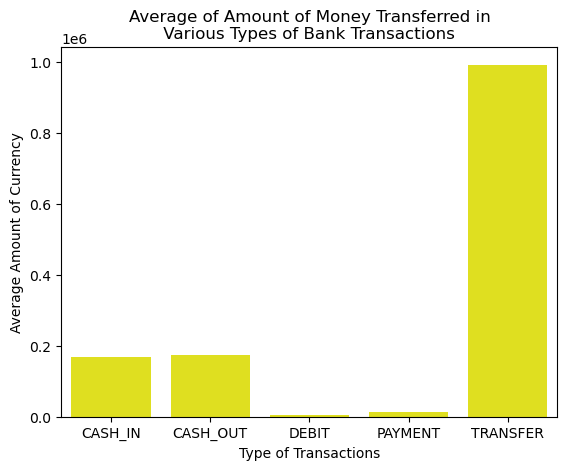

In [101]:
#bar graph to show the relationship between type of transaction and average amount of money transferred
trans_samp_amount = trans_samp_df.groupby(by= "type").agg('mean')
trans_samp_amount[['amount']]

sns.barplot(data=trans_samp_amount,x= "type", y = "amount", color= "yellow")
plt.xlabel('Type of Transactions')
plt.ylabel('Average Amount of Currency')
plt.title('Average of Amount of Money Transferred in\n Various Types of Bank Transactions ')
plt.show() 



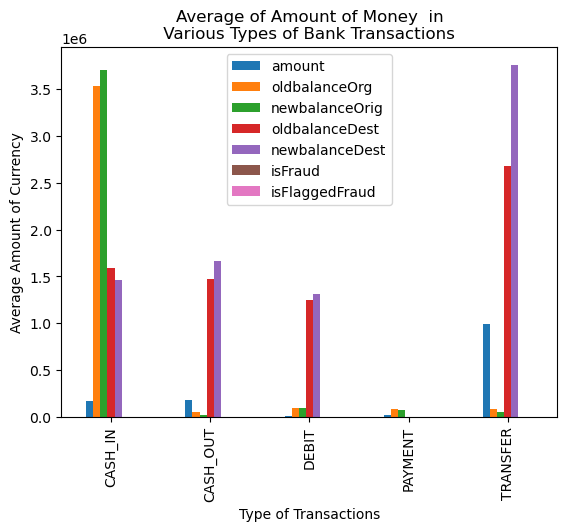

In [110]:
trans_samp_amount.plot.bar()
plt.xlabel('Type of Transactions')
plt.ylabel('Average Amount of Currency')
plt.title('Average of Amount of Money  in\n Various Types of Bank Transactions ')
plt.show()

### Question 4
Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

In [ ]:
trans_samp_fraud = trans_samp_df.groupby(['type','isFraud']).agg('mean')
trans_samp_fraud


amount  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                 
CASH_IN  0        168163.854480   3.537478e+06    3.705642e+06   
CASH_OUT 0        173657.161011   4.385614e+04    1.733077e+04   
         1        551565.510000   5.515655e+05    0.000000e+00   
DEBIT    0          4546.179091   9.039722e+04    8.708098e+04   
PAYMENT  0         13829.612909   7.595764e+04    6.909514e+04   
TRANSFER 0        994501.488020   8.340129e+04    4.703470e+04   
         1        311907.235000   3.119072e+05    0.000000e+00   

                  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                  
CASH_IN  0          1.584238e+06    1.462697e+06             0.0  
CASH_OUT 0          1.470443e+06    1.662070e+06             0.0  
         1          7.408135e+05    1.292379e+06             0.0  
DEBIT    0          1.247982e+06    1.312807e+06             0.0  
PAYMENT  0          0.000000e+00    0.000000e+00             0.0  
TRANSFER 0          2.689730e+06    3.781396e+06             0.0  
         1          0.000000e+00    0.000000e+00             0.0

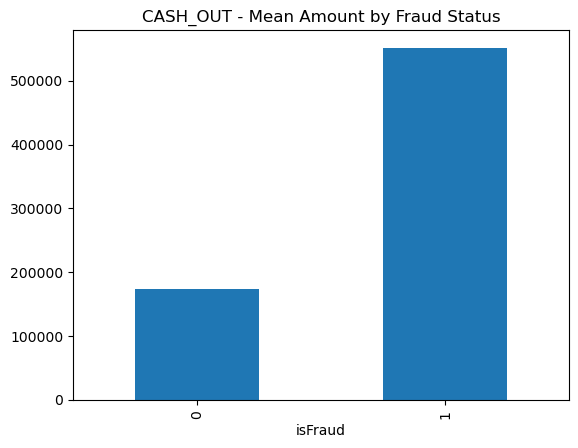

In [118]:
trans_samp_fraud.loc['CASH_OUT', 'amount'].plot(kind='bar')
plt.title('CASH_OUT - Mean Amount by Fraud Status')
plt.show()

In [119]:
trans_samp_fraud.loc['CASH_OUT'].plot(kind='scatter')
plt.title('CASH_OUT - Mean Amount by Fraud Status')
plt.show()

ValueError: scatter requires an x and y column

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

* All the numeric features in our data set have a right skewed distribution showing that most transactions involve lower amounts of money.

* Mode < Median < Mean

In [ ]:
#Add figure with 4 graphs 
#Give specfic examples of the histogram 

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here